In [1]:
#do the essential imports
import numpy as np
import tensorflow as tf

In [2]:
#create unit guassian data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*7
act = {'relu':lambda x:np.maximum(x, 0), 'tanh':lambda x:np.tanh(x)}

In [3]:
#different ways to create the weights for neural networks
def get_weights(s, fan_in, fan_out):
    if s=='0.01':
        return np.random.randn(fan_in, fan_out)*0.01
    elif s=='xavier':
        return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    elif s=='xavier2':
        return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)
    else:
        return np.random.randn(fan_in, fan_out)*1.0

In [4]:
#printing the stats
import matplotlib.pyplot as plt


def do_plotting(hidden_layers, layer_means, layer_stds):
    plt.figure()
    #todo find it
    plt.subplot(121)
    plt.plot(hidden_layers.keys(), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(hidden_layers.keys(), layer_stds, 'or-')
    plt.title('layer std')

    #plot the raw distribution
    plt.figure()
    for i, H in hidden_layers.iteritems():
        plt.subplot(1, len(hidden_layers), i+1)
        plt.hist(H.ravel(), 30, range=(-1, 1))

In [5]:
#do the forward passing in the network
def get_hidden_layer_results(D, name_of_non_lin, hidden_layer_sizes, weight_type):
    nonlinearities = [name_of_non_lin]*len(hidden_layer_sizes)
    Hs = {}
    for i in range(len(hidden_layer_sizes)):
        X       = D if i==0 else Hs[i-1]
        fan_in  = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W       = get_weights(weight_type, fan_in, fan_out)
        H       = np.dot(X, W)
        H       = act[nonlinearities[i]](H)
        Hs[i]   = H
    return Hs

In [6]:
#printing the layer stats
def print_layer_stats(D, Hs):
    #looking at the distribution of each layer
    print "input layer has mean %f and std %f" % (np.mean(D), np.std(D))
    layer_means = [np.mean(H) for i, H in Hs.iteritems()]
    layer_stds = [np.std(H) for i, H in Hs.iteritems()]
    for i, H in Hs.iteritems():
        print "hidden layer %d mean %f and std %f" %(i+1, layer_means[i], layer_stds[i])
    return layer_means, layer_stds

input layer has mean -0.000496 and std 1.000481
hidden layer 1 mean -0.000570 and std 0.213305
hidden layer 2 mean -0.000024 and std 0.047557
hidden layer 3 mean -0.000008 and std 0.010626
hidden layer 4 mean -0.000001 and std 0.002368
hidden layer 5 mean -0.000000 and std 0.000530
hidden layer 6 mean -0.000000 and std 0.000119
hidden layer 7 mean 0.000000 and std 0.000027


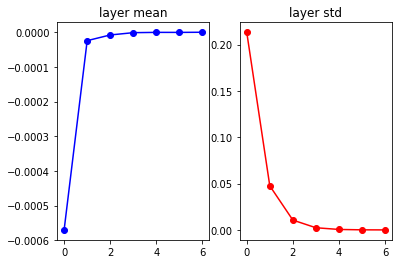

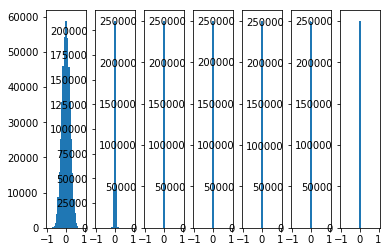

In [7]:
#small weights for tanh
sw_hidden_layers = get_hidden_layer_results(D, 'tanh', hidden_layer_sizes, '0.01')
sw_means, sw_stds = print_layer_stats(D, sw_hidden_layers)
do_plotting(sw_hidden_layers, sw_means, sw_stds)
#mean of 0 and stddev of 1 and using tanh mean stays around 0 but stddev goes to around zero
#histogram is spread of [-1, 1] and end upto all zeros and all tanh outputting zeros actually

input layer has mean -0.000496 and std 1.000481
hidden layer 1 mean 0.001048 and std 0.981888
hidden layer 2 mean -0.000240 and std 0.981705
hidden layer 3 mean 0.001826 and std 0.981670
hidden layer 4 mean 0.001919 and std 0.981677
hidden layer 5 mean -0.001974 and std 0.981654
hidden layer 6 mean 0.000086 and std 0.981563
hidden layer 7 mean -0.000008 and std 0.981740


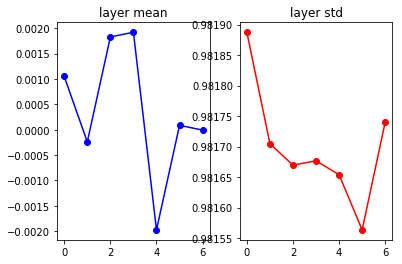

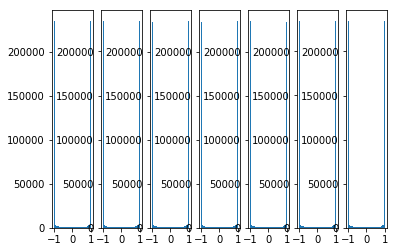

In [8]:
#small weights for tanh
#TODO: why last 2 are around no [-1, +1] it fluctuates and all of neurons are eighter [-1 or 1] and hence no
#gradients pass for neural network
la_hidden_layers = get_hidden_layer_results(D, 'tanh', hidden_layer_sizes, '1.0')
la_means, la_stds = print_layer_stats(D, la_hidden_layers)
do_plotting(la_hidden_layers, la_means, la_stds)

input layer has mean -0.000496 and std 1.000481
hidden layer 1 mean 0.000760 and std 0.627362
hidden layer 2 mean -0.000248 and std 0.485876
hidden layer 3 mean -0.000049 and std 0.407603
hidden layer 4 mean 0.000152 and std 0.355911
hidden layer 5 mean 0.001115 and std 0.319444
hidden layer 6 mean -0.000004 and std 0.294355
hidden layer 7 mean 0.000003 and std 0.271510


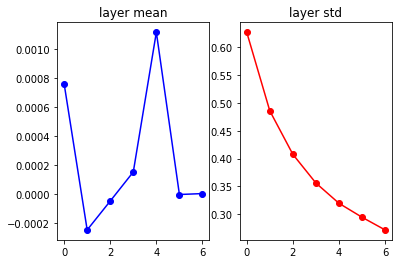

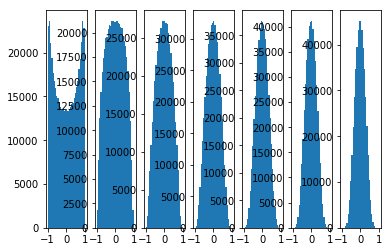

In [9]:
#small weights for tanh
#doing it will help and you will see the some of good distribution
xavier_hidden_layers = get_hidden_layer_results(D, 'tanh', hidden_layer_sizes, 'xavier')
xavier_means, xavier_stds = print_layer_stats(D, xavier_hidden_layers)
do_plotting(xavier_hidden_layers, xavier_means, xavier_stds)


input layer has mean -0.000496 and std 1.000481
hidden layer 1 mean 0.399040 and std 0.584392
hidden layer 2 mean 0.268017 and std 0.403827
hidden layer 3 mean 0.191126 and std 0.272450
hidden layer 4 mean 0.132575 and std 0.193254
hidden layer 5 mean 0.093763 and std 0.136107
hidden layer 6 mean 0.067383 and std 0.097891
hidden layer 7 mean 0.045646 and std 0.069067


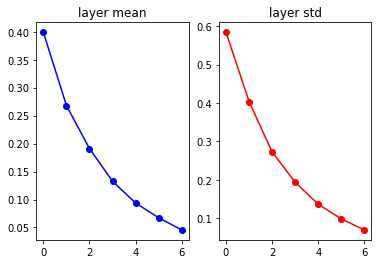

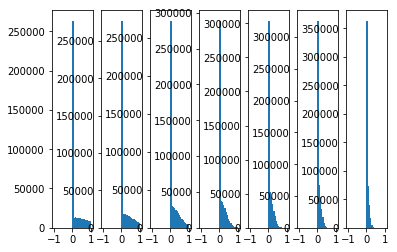

In [10]:
#small weights for tanh
#relu fails here and you will see peaks around value==0
#distribution get peaky at 0 and more and more neurons are not activating
xavier_relu_layers = get_hidden_layer_results(D, 'relu', hidden_layer_sizes, 'xavier')
xrelu_means, xrelu_stds = print_layer_stats(D, xavier_relu_layers)
do_plotting(xavier_relu_layers, xrelu_means, xrelu_stds)


input layer has mean -0.000496 and std 1.000481
hidden layer 1 mean 0.565739 and std 0.827130
hidden layer 2 mean 0.582631 and std 0.844197
hidden layer 3 mean 0.569693 and std 0.822173
hidden layer 4 mean 0.537644 and std 0.797272
hidden layer 5 mean 0.531477 and std 0.781948
hidden layer 6 mean 0.483929 and std 0.726158
hidden layer 7 mean 0.508107 and std 0.754329


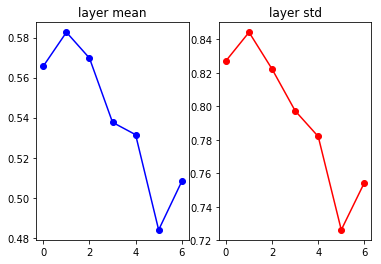

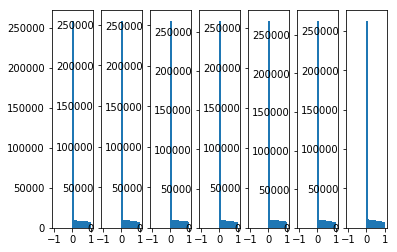

In [11]:
#small weights for tanh
#perfect way to do the init of relu functions
xavier_div2_relu_layers = get_hidden_layer_results(D, 'relu', hidden_layer_sizes, 'xavier2')
x2relu_means, x2relu_stds = print_layer_stats(D, xavier_div2_relu_layers)
do_plotting(xavier_div2_relu_layers, x2relu_means, x2relu_stds)
